Using the glass.csv file on Github, answer the following questions-
1)Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.
2)Do the same analysis for other columns
3)Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

c:\Users\TerryLu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


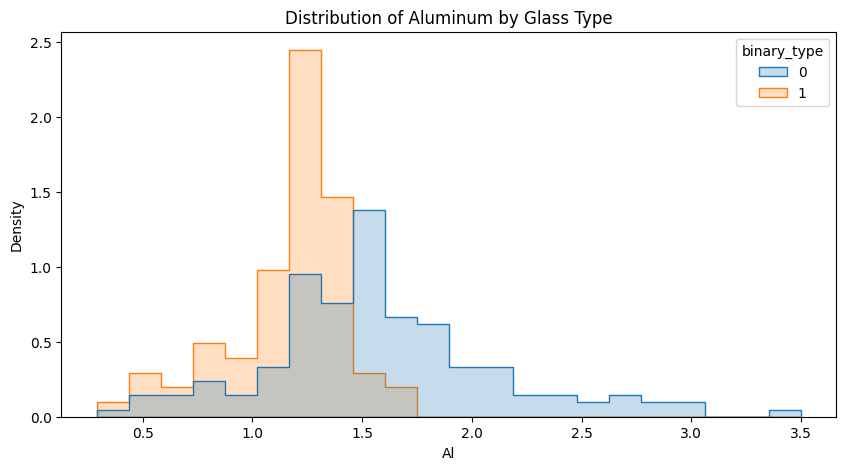

   Threshold  Accuracy  Precision    Recall
0        0.1  0.461538   0.351852  1.000000
1        0.2  0.584615   0.409091  0.947368
2        0.3  0.753846   0.548387  0.894737
3        0.4  0.723077   0.521739  0.631579
4        0.5  0.661538   0.384615  0.263158
5        0.6  0.707692   0.500000  0.263158
6        0.7  0.646154   0.166667  0.052632
7        0.8  0.692308   0.333333  0.052632
8        0.9  0.707692   0.000000  0.000000


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load the data
glass_data = pd.read_csv("glass.csv")

# Define the binary classification target based on 'Type'
glass_data['binary_type'] = (glass_data['Type'] == 1).astype(int)

# Select features and target
X = glass_data[['Al']]  # Feature
y = glass_data['binary_type']  # Binary target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the feature (Al)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Define thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Evaluate metrics for different thresholds
metrics = []
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    metrics.append((t, acc, prec, rec))

# Plot the distribution of 'Al' by type
plt.figure(figsize=(10, 5))
sns.histplot(data=glass_data, x='Al', hue='binary_type', element='step', stat='density', common_norm=False)
plt.title('Distribution of Aluminum by Glass Type')
plt.show()

# Convert metrics to DataFrame for display
metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Accuracy', 'Precision', 'Recall'])
print(metrics_df)
